In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import string

In [3]:
heart_data = pd.read_csv("Data/Cleveland Heart Dataset.csv")
print (heart_data.head())
print (heart_data.tail())
print (heart_data.info())
print (heart_data.target.unique())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

  ca thal  target  
0  0    6       0  
1  3    3       2  
2  2    7       1  
3  0    3       0  
4  0    3       0  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1

In [3]:
# Missing values are denoted by "?"
replace_dict = {"?" : np.nan}

heart_data.replace(replace_dict, regex=False, inplace=True)
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3,0


In [4]:
print (heart_data.isna().any())
heart_data.dropna(axis = 0, inplace=True)
heart_data.reset_index(drop=True, inplace=True)
print (heart_data.info())
heart_data['ca'] = heart_data['ca'].astype(str).astype('int64')
heart_data['thal'] = heart_data['thal'].astype(str).astype('int64')
print (heart_data.info())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
target      False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slope       297 non-null int64
ca          297 non-null object
thal        297 non-null object
target      297 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 32.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non

In [1]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

NameError: name 'pd' is not defined

In [5]:
# Identifying continuos and categorical columns based on data information
heart_data = pd.get_dummies(heart_data, columns=['sex', 'cp', 'restecg', 'fbs', 'exang', 'thal'])
col_name="target"
# Poping the target column and adding it to the last place. Making target column last in dataframe columns
first_col = heart_data.pop(col_name)
heart_data.insert(len(heart_data.columns), col_name, first_col)

In [6]:
# Converting the target variable to 0 and 1 (0: No heart disease, 1: Presence of heart disease)
disease_presence = {1: 1, 2: 1, 3: 1, 4: 1, 0: 0}
heart_data['target'] = heart_data.target.map(disease_presence)
heart_data.target.unique()

array([0, 1], dtype=int64)

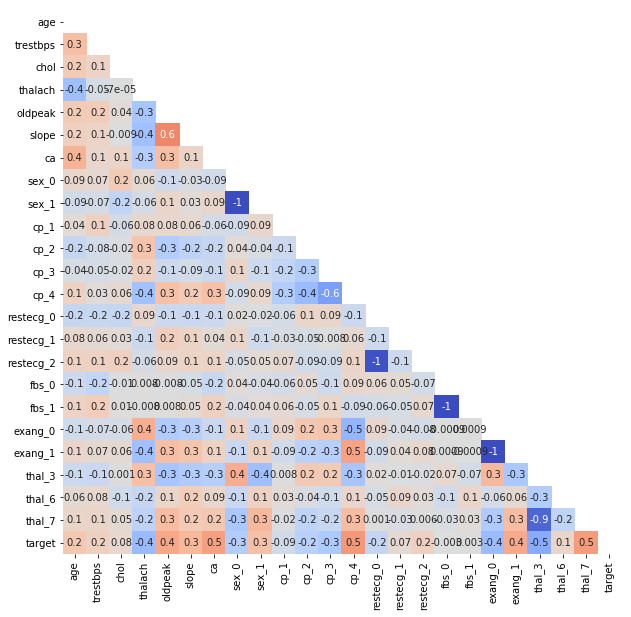

In [7]:
# Correlation among the data columns
# np.triu: Upper triangle of the matrix (Use np.tril for lower triangle of matrix)
matrix = np.triu(heart_data.corr())
fig, ax = plt.subplots(figsize=(10,10))   
# Plot the seaborn correlation plot
sns.heatmap(heart_data.corr(), annot=True, fmt='.1g', 
            vmax=1, vmin=-1, center=0, cmap='coolwarm',
            cbar=False,
            mask=matrix, ax = ax);

In [8]:
heart_data.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,fbs_0,fbs_1,exang_0,exang_1,thal_3,thal_6,thal_7,target
0,63,145,233,150,2.3,3,0,0,1,1,...,0,1,0,1,1,0,0,1,0,0
1,67,160,286,108,1.5,2,3,0,1,0,...,0,1,1,0,0,1,1,0,0,1
2,67,120,229,129,2.6,2,2,0,1,0,...,0,1,1,0,0,1,0,0,1,1
3,37,130,250,187,3.5,3,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,41,130,204,172,1.4,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,0


In [16]:
# Presence of heart problem based on sex
print (heart_data['sex_0'].sum())
print (heart_data['sex_1'].sum())

heart_data.groupby(['sex_0', 'sex_1', 'target'])['age'].count()

96
201


sex_0  sex_1  target
0      1      0          89
              1         112
1      0      0          71
              1          25
Name: age, dtype: int64

In [18]:
heart_data.groupby(['trestbps', 'target'])['age'].count()

trestbps  target
94        0          2
100       0          2
          1          2
101       0          1
102       0          2
104       0          1
105       0          3
106       0          1
108       0          4
          1          2
110       0          8
          1         11
112       0          5
          1          4
114       1          1
115       0          3
117       1          1
118       0          5
          1          2
120       0         23
          1         14
122       0          3
          1          1
123       1          1
124       0          2
          1          4
125       0          3
          1          7
126       0          1
          1          2
                    ..
142       1          1
144       1          2
145       0          1
          1          4
146       0          1
          1          1
148       0          1
          1          1
150       0          9
          1          8
152       0          2
          1      